In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model 
import matplotlib.pyplot as plt
import os

In [2]:
np.random.seed(42)

In [3]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bikesData['yr'].unique()

array([0, 1])

In [6]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']

In [7]:
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [10]:
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61,724.041667


In [11]:
train_set,test_set = train_test_split(bikesData,test_size=0.3)

In [12]:
train_set.sort_values('dayCount',inplace=True)
test_set.sort_values('dayCount',inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
print(train_set.shape[0],test_set.shape[0])

12165 5214


In [14]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [15]:
columnsToScale  = ['temp','hum','windspeed']

In [16]:
scaler = StandardScaler()

In [17]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.fit_transform(test_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [18]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,-1.440143,0.892500,-1.552670,40,0.041667
2,1,0,1,2,0,6,0,1,-1.440143,0.892500,-1.552670,32,0.083333
4,1,0,1,4,0,6,0,1,-1.336557,0.633846,-1.552670,1,0.166667
6,1,0,1,6,0,6,0,1,-1.440143,0.892500,-1.552670,2,0.250000
7,1,0,1,7,0,6,0,1,-1.543729,1.202885,-1.552670,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,-1.232972,-0.762886,-0.818365,164,723.833333
17373,1,1,12,18,0,1,1,2,-1.232972,-0.762886,-0.452032,122,723.875000
17374,1,1,12,19,0,1,1,2,-1.232972,-0.142116,-0.206991,119,723.916667
17376,1,1,12,21,0,1,1,1,-1.232972,-0.142116,-0.206991,90,724.000000


In [19]:
train_set.temp.mean()

1.6589552036519725e-15

In [20]:
test_set.temp.mean()

-2.9938119919888186e-15

In [36]:
from sklearn.model_selection import  cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [48]:
trainingCols = train_set.drop('cnt',axis=1)
trainingLabels = train_set['cnt']

In [60]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [79]:
dt_mae_scores = -cross_val_score(dec_reg,trainingCols,trainingLabels,scoring='neg_mean_absolute_error',cv=10,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [80]:
display_scores(dt_mae_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572


In [81]:
((dt_mae_scores.mean()) > 30) and ((dt_mae_scores.mean()) < 60)

True

In [95]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,trainingCols,trainingLabels,scoring='neg_mean_squared_error',cv=10,verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [96]:
display_scores(dt_mse_scores)

Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [94]:
((dt_mse_scores.mean()) > 50) and ((dt_mse_scores.mean()) < 90)

False

In [101]:
lin_reg = LinearRegression()

In [103]:
lr_mae_scores = -cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')

In [104]:
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942311
Standard deviation: 31.426965705295515


In [105]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_squared_error'))

In [106]:
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181813
Standard deviation: 37.55565075919517


In [111]:
forest_reg = RandomForestRegressor(random_state=42,n_estimators=150)

In [112]:
rf_mae_scores = -cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')


In [113]:
display_scores(rf_mae_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963


In [114]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_squared_error'))


In [115]:
display_scores(rf_mse_scores)

Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


In [120]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = [{'n_estimators':[120,150],'max_features':[10,12],'max_depth':[15,28]},]

In [135]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

In [136]:
type(grid_search)

sklearn.model_selection._search.GridSearchCV

In [139]:
grid_search.fit(trainingCols,trainingLabels)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [140]:
print(grid_search.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [141]:
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [151]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [155]:
final_model = grid_search.best_estimator_

In [156]:
test_set.sort_values('dayCount',inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
test_x_cols = test_set.drop('cnt',axis=1).columns.values
test_x_cols

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dayCount'], dtype=object)

In [158]:
test_y_cols = 'cnt'

In [168]:
X_test = test_set.loc[:,test_x_cols]

In [169]:
y_test = test_set.loc[:,test_y_cols]

In [179]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [180]:
mse = mean_squared_error(y_test,test_set.loc[:,'predictedCounts_test'])
mse

1561.758312392972

In [187]:
final_mse = np.sqrt(mse)
print(final_mse)

39.519087949913164


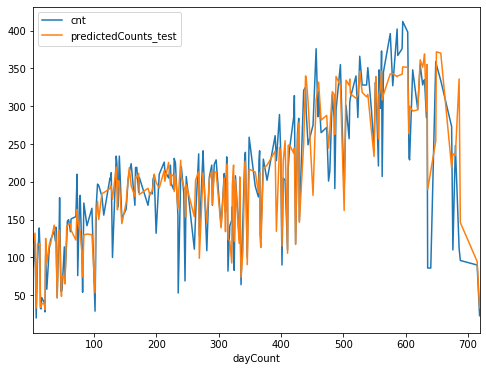

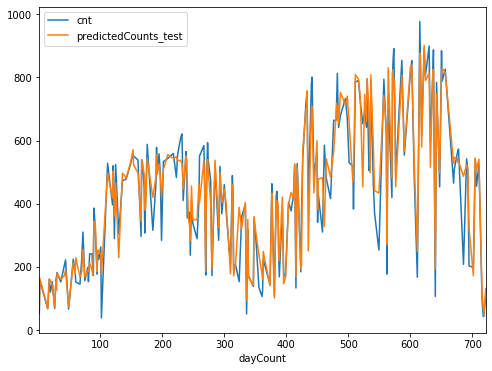

In [188]:
times=[9,18]
for time in times:
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()
    